## Detecting bad electrodes

### Getting started
The EEG is stored in hierachical data format (HDF5). This format is widely used, open, and supported in many languages, e.g., matlab, R, python, C, etc.

Here, I will use the h5py library in python

In [3]:
# import libraries
from __future__ import print_function, division, unicode_literals
%matplotlib inline
# %matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
from pprint import pprint

import stacklineplot # local copy

# matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [4]:
hdf = h5py.File('./archive/AA39404E_1-1+.eeghdf')

The data is stored hierachically in an hdf5 file as a tree of keys and values.
It is possible to inspect the file using standard hdf5 tools.
Below we show the keys and values associated with the root of the tree. This shows that there is a "patient" group and a group "record-0"

In [5]:
list(hdf.items())

[('patient', <HDF5 group "/patient" (0 members)>),
 ('record-0', <HDF5 group "/record-0" (10 members)>)]

We can focus on the patient group and access it via hdf['patient'] as if it was a python dictionary. Here are the key,value pairs in that group. Note that the patient information has been anonymized. Everyone is given the same set of birthdays. This shows that this file is for Subject 2619, who is male.

In [6]:
list(hdf['patient'].attrs.items())

[('patient_name', '9192, Subject'),
 ('patientcode', 'd3c8726494175cb291a2de1f88855a2b'),
 ('gender', 'Female'),
 ('birthdate', '1990-01-01'),
 ('patient_additional', ''),
 ('gestatational_age_at_birth_days', -1.0),
 ('born_premature', 'unknown')]

Now we look at how the waveform data is stored. By convention, the first record is called "record-0" and it contains the waveform data as well as the approximate time (relative to the birthdate)at which the study was done, as well as technical information like the number of channels, electrode names and sample rate.

In [7]:
rec = hdf['record-0']
list(rec.attrs.items())

[('start_isodatetime', '2027-12-24 14:24:38'),
 ('end_isodatetime', '2027-12-25 14:37:20'),
 ('number_channels', 25),
 ('number_samples_per_channel', 17432400),
 ('sample_frequency', 200.00000000000003),
 ('bits_per_sample', 16),
 ('technician', ''),
 ('patient_age_days', 13871.600439814814)]

We can then grab the actual waveform data and visualize it.

In [8]:
signals = rec['signals']
labels = rec['signal_labels']
electrode_labels = [str(s,'ascii') for s in labels]
numbered_electrode_labels = ["%d:%s" % (ii, str(labels[ii], 'ascii')) for ii in range(len(labels))]

#### Simple visualization of EEG (brief absence seizure)

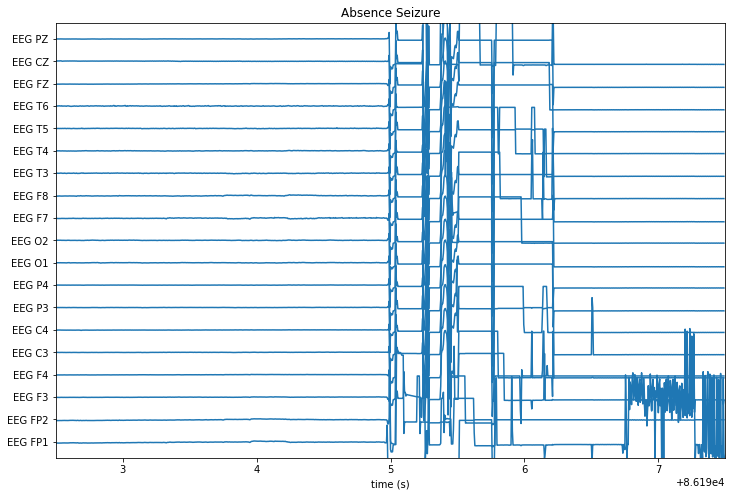

In [9]:
# search identified spasms at 1836, 1871, 1901, 1939
tnow = 60*60*23 + 56*60 +35
stacklineplot.show_epoch_centered(signals, tnow,epoch_width_sec=5,chstart=0, chstop=19, fs=rec.attrs['sample_frequency'], ylabels=electrode_labels, yscale=3.0)
plt.title('Absence Seizure');

shortenedData: [[  -880   -860   -849   -860   -890   -880   -880   -860   -860   -849
    -798   -808   -778   -778   -788   -808   -798   -819   -808   -798
    -767   -716   -686   -696   -696   -686   -634   -696   -706   -696
    -757   -767   -706   -686   -808   -911   -849   -819   -880   -880
    -808   -757   -757   -798   -808   -767   -798   -849   -860   -839
    -839   -839   -829   -798   -788   -819   -839   -819   -788   -767
    -798   -767   -757   -767   -757   -747   -747   -727   -778   -778
    -737   -706   -675   -696   -655   -634   -655   -593   -624   -655
    -624   -675   -696   -675   -604   -634   -624   -634   -614   -624
    -573   -583   -593   -696   -614   -511   -655   -696   -624   -645
    -675   -706   -686   -665   -665   -593   -593   -583   -583   -604
    -634   -624   -593   -573   -604   -552   -552   -573   -573   -573
    -552   -552   -532   -450   -491   -491   -491   -511   -542   -552
    -552   -532   -481   -419   -460   -522   -50

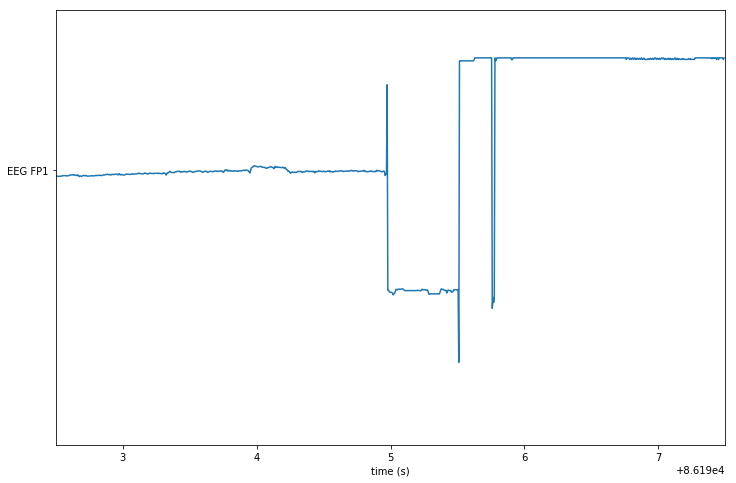

In [11]:
#goto_sample = int(fs * goto_sec)
fs=200
goto_sample = int(200 * tnow)
hw = half_width_epoch_sample = int(5*200/2) #500
numSamples, numRows = signals.shape

# plot epochs of width epoch_width_sec centered on (multiples in DE)
ch0=0
ch1=1

epoch = 53
ptepoch = int(10*200)
dp = int(0.5*ptepoch)

s0 = stacklineplot.limit_sample_check(goto_sample-hw, signals)
s1 = stacklineplot.limit_sample_check(goto_sample+hw, signals)
duration = (s1-s0)/fs
#print("duration:",duration)
start_time_sec = s0/fs

data = signals[ch0:ch1,s0:s1]
dmin = data.min()
#print(type(dmin))
dmin = dmin.astype(np.int64)
#print(type(dmin))
dmax = data.max()
dmax = dmax.astype(np.int64)
dr = (dmax - dmin)*0.7# Crowd them a bit.
#print(dr)
#print(s0)
 
y0 = dmin
y1 = (numRows-1) * dr + dmax
#ylim(y0, y1)

shortenedData = signals[ch0:ch1,s0:s1]
print("shortenedData:", shortenedData)
#print("numsamples:",numSamples)
#print("numrows:",numRows)
#t = duration * np.arange(numSamples, dtype=float)/numSamples
#print("t:",t)
#segs = []
#for i in range(numRows):
#    segs.append(np.hstack((t[:,np.newaxis], data[:,i,np.newaxis])))
    #print("segs[-1].shape:", segs[-1].shape)
    #print("t:", t)
    #print("segs[-1]:", segs[-1])
#print("segs:",segs)    


stacklineplot.stackplot(signals[ch0:ch1,s0:s1],start_time=start_time_sec, seconds=duration, ylabels=electrode_labels[ch0:ch1], yscale=0.7)
   

norm: 343079.339054
norms: {85895: 214221, 85995: 230943, 86095: 245372, 86195: 7611512, 86295: 10926000, 86395: 11030132}


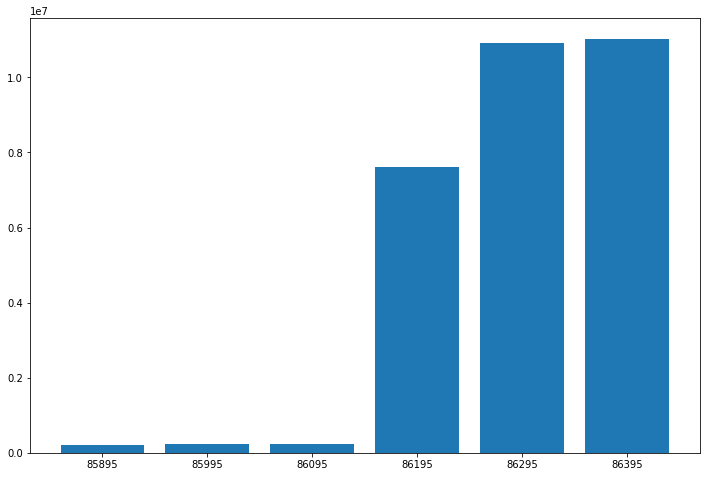

In [33]:
norm = np.linalg.norm(shortenedData)
print("norm:",norm)

def getNormalOfAtomicSegment(signals, goto_sec,
                        epoch_width_sec,
                        chstart, chstop, fs):
        
    goto_sample = int(fs * goto_sec)
    hw = half_width_epoch_sample = int(epoch_width_sec*fs/2)
    
    # plot epochs of width epoch_width_sec centered on (multiples in DE)
    ch0, ch1 = chstart, chstop
   
    epoch = 53
    ptepoch = int(10*fs)
    dp = int(0.5*ptepoch)
    s0 = stacklineplot.limit_sample_check(goto_sample-hw, signals)
    s1 = stacklineplot.limit_sample_check(goto_sample+hw, signals)
    duration = (s1-s0)/fs
    start_time_sec = s0/fs
    
    shortenedData = signals[ch0:ch1,s0:s1]
    shortenedData = shortenedData.astype(int)
    #shortenedData = signals[0:2,s0:s1]
    #print("shortenedData:", shortenedData)
    norm = np.linalg.norm(shortenedData)
    norm = norm.astype(int)
    #print("norm:",norm)
    return norm

def getNormalOfSegment(signals, start, end, 
                        epoch_width_sec,
                        chstart, chstop, fs):
    # norms will be a list of seconds at the start of the epoch, and the respective normal for that epoch
    # the normal is calculated by calculating the normal for each channel and summing them
    # alternatively, one can calculate the normal for each channel to determine when a single channel can be bad
    norms = {}
    for i in range(start,end,epoch_width_sec):
        norms[i] = getNormalOfAtomicSegment(signals, i,epoch_width_sec,chstart, chstop, fs)
    return norms

norms = getNormalOfSegment(signals, tnow-300, tnow+300, 100, chstart=0, chstop=19, fs=rec.attrs['sample_frequency'])
print("norms:",norms)

D = norms

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())

plt.show()
#stacklineplot.show_epoch_centered(signals, tnow,epoch_width_sec=60,chstart=0, chstop=19, fs=rec.attrs['sample_frequency'], ylabels=electrode_labels, yscale=3.0)


entireDuration 87161
norms: {0: 1401924, 4358: 693080, 8716: 689421, 13074: 223729, 17432: 196953, 21790: 565529, 26148: 709048, 30506: 190075, 34864: 229311, 39222: 422711, 43580: 227798, 47938: 223393, 52296: 191925, 56654: 223991, 61012: 611206, 65370: 444805, 69728: 552289, 74086: 521685, 78444: 555091, 82802: 601567, 87160: 24565948}


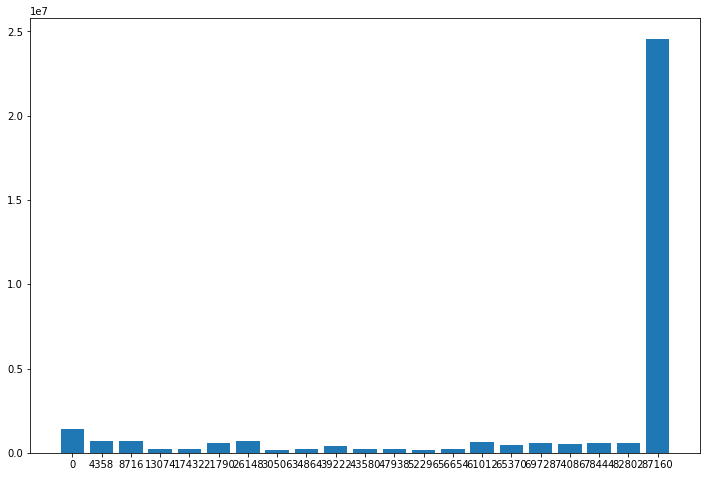

In [156]:
# first, divide EEG up into 10 segments and average them to determine the baseline normal length
# now divide EEG up into 100 segments and determine any outliers
# for each outlier segment, examine that segment and divide it up more to pinpoint the time when the normal changed drastically

import math
entireDuration =math.floor(rec.attrs['number_samples_per_channel']/rec.attrs['sample_frequency'])
#print("entireDuration:",entireDuration)
norms = {}
# delta is the seconds of each epoch, used to calculate the line length. shorter means faster scanning but less accurate. 
delta_of_epoch = 5*rec.attrs['sample_frequency']
samples_for_baseline = 20 
for i in range(0,entireDuration, math.floor(entireDuration/samples_for_baseline)):
    norms[i] = getNormalOfAtomicSegment(signals, i, delta_of_epoch, chstart=0, chstop=19, fs=rec.attrs['sample_frequency'])
                                     
print("entireDuration",entireDuration)
print("norms:",norms)

def plotScatter(D):
    
    plt.bar(range(len(D)), D.values(), align='center')
    plt.xticks(range(len(D)), D.keys())

    plt.show()

plotScatter(D)

norms: {0: 1401924, 4358: 693080, 8716: 689421, 13074: 223729, 17432: 196953, 21790: 565529, 26148: 709048, 30506: 190075, 34864: 229311, 39222: 422711, 43580: 227798, 47938: 223393, 52296: 191925, 56654: 223991, 61012: 611206, 65370: 444805, 69728: 552289, 74086: 521685, 78444: 555091, 82802: 601567, 87160: 24565948}
[1401924, 693080, 689421, 223729, 196953, 565529, 709048, 190075, 229311, 422711, 227798, 223393, 191925, 223991, 611206, 444805, 552289, 521685, 555091, 601567, 24565948]
norms: {0: 1401924, 4358: 693080, 8716: 689421, 13074: 223729, 17432: 196953, 21790: 565529, 26148: 709048, 30506: 190075, 34864: 229311, 39222: 422711, 43580: 227798, 47938: 223393, 52296: 191925, 56654: 223991, 61012: 611206, 65370: 444805, 69728: 552289, 74086: 521685, 78444: 555091, 82802: 601567}


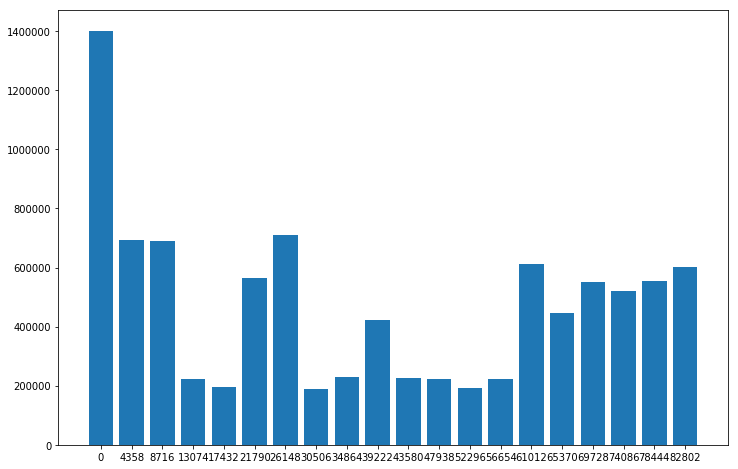

In [157]:
# this function calculates the average of a given list and throws away outliers
def throwAwayOutlier(dictname):
    m = 4 #how many standard deviations away
    data = list(dictname.values())
    print(data)
    newdata = {}
    mean = np.mean(data)
    std = m * np.std(data)
    for key, value in dictname.items():
        if (abs(dictname[key] - mean) < std):
            newdata[key] = value                
    return newdata

print("norms:",norms)
baselineNorms = throwAwayOutlier(norms)
print("norms:",baselineNorms)
# draw a bar graph of the new data with the outlier removed
plotScatter(baselineNorms)


norms: {0: 1172723, 174: 607161, 348: 433054, 522: 361117, 696: 397607, 870: 314272, 1044: 301335, 1218: 313408, 1392: 321558, 1566: 279782, 1740: 205659, 1914: 180898, 2088: 564537, 2262: 268143, 2436: 149555, 2610: 153058, 2784: 190185, 2958: 182488, 3132: 181133, 3306: 163773, 3480: 318349, 3654: 294320, 3828: 291758, 4002: 404495, 4176: 370622, 4350: 238300, 4524: 217954, 4698: 171568, 4872: 197839, 5046: 492756, 5220: 193367, 5394: 265188, 5568: 275454, 5742: 231537, 5916: 212819, 6090: 275319, 6264: 290490, 6438: 274121, 6612: 208445, 6786: 183993, 6960: 282278, 7134: 375812, 7308: 174597, 7482: 218054, 7656: 190073, 7830: 221656, 8004: 219768, 8178: 283690, 8352: 274070, 8526: 335190, 8700: 220013, 8874: 291962, 9048: 275621, 9222: 282988, 9396: 285497, 9570: 362551, 9744: 331680, 9918: 296555, 10092: 327570, 10266: 296844, 10440: 211821, 10614: 303979, 10788: 327820, 10962: 215666, 11136: 226733, 11310: 264897, 11484: 177514, 11658: 85013, 11832: 141110, 12006: 129164, 12180: 1

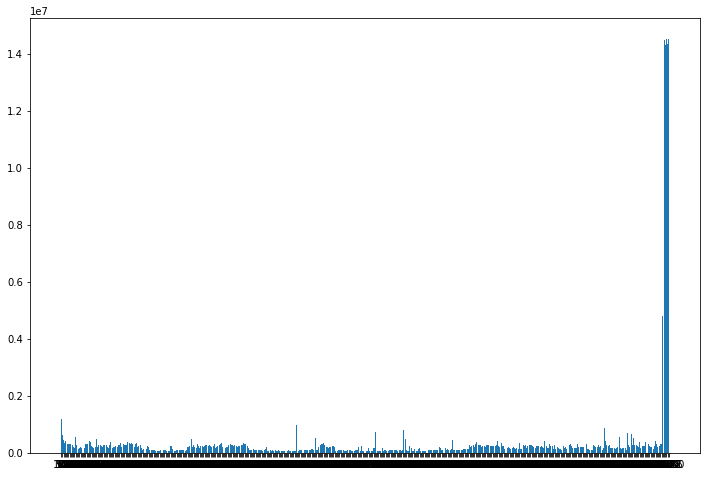

candidateList: [[86130, 86304], [86304, 86478], [86478, 86652], [86652, 86826], [86826, 87000], [87000, 87161]]


In [158]:
# this function divides the list into tinier segments, and marks the segments that may have more noise
def findTheOutliers(baselineNorms, signals):
    m = 4 #how many standard deviations away
    data = list(baselineNorms.values())
    mean = np.mean(data)
    std = m * np.std(data)
    
    norms = {}
    num_samples = 500 
    delta = math.floor(entireDuration / num_samples) 
    for i in range(0,entireDuration, delta):
    #for i in range(73666,entireDuration, delta):
        norms[i] = getNormalOfAtomicSegment(signals, i, delta, chstart=0, chstop=19, fs=rec.attrs['sample_frequency'])

    print("norms:",norms)    
    plotScatter(norms)

    candidateList = []
    for key, value in norms.items():
        if (abs(norms[key] - mean) > std):
            if (key+delta > entireDuration):
                endTime = entireDuration
            else:
                endTime = key+delta
            candidateList.append([key,endTime])                 
    
    print("candidateList:",candidateList)
    return candidateList

candidateList = findTheOutliers(baselineNorms, signals)

In [159]:
# in the candidatelist, merge adjacent periods together
def mergeAdjacentEpochsBroken(candidateList):
    newCandidateList = []
    priorCandidate = []
    for candidate in candidateList:        
        print("pass,", candidate, "prior ", priorCandidate)
        if (priorCandidate):
            if (abs(priorCandidate[1]-candidate[0]) < 5):
                # adjacent epochs found
                print("adjacent found")
                newCandidate = [priorCandidate[0], candidate[1]]
                candidate = newCandidate
                print("new candidate set ", newCandidate)
            else:
                print("no adjacent found")
                if (newCandidate):
                    print("adding new candidate")                    
                    newCandidateList.append(newCandidate)
                    newCandidate = False
                print("appending", candidate)
                newCandidateList.append(candidate)
        priorCandidate = candidate
    # for the last candidate...
    if (newCandidate):
        print("last candidate, ", newCandidate)
        newCandidateList.append(newCandidate)
    return newCandidateList

def mergeAdjacentEpochs(candidateList):
    flat_list = [item for sublist in candidateList for item in sublist]
    old = flat_list[0]
    #newCandidateList = [flat_list[0]]
    i = 0 
    while i<len(flat_list)-1:
    #for i in range(1,len(flat_list)):
        i+=1
        #print("pass,", i, "value ", flat_list[i], "list ", flat_list)
        if (abs(flat_list[i-1]-flat_list[i]) < 5):
            # adjacent epochs found
            #print("adjacent found")
            del flat_list[i-1]
            del flat_list[i-1]
            i = i-2
    #print (flat_list)
    # convert back to doublets
    newCandidateList = []
    for i in range(0,len(flat_list),2):
        candidate = [flat_list[i],flat_list[i+1]]
        newCandidateList.append(candidate)
    return newCandidateList

#candidateList = [[333,86228],[86229, 87100], [87100, 87971], [40, 440],[442,488],[3,77],[28,44],[44,67],[67,88]]
candidateList = mergeAdjacentEpochs(candidateList)
print("candidateList", candidateList)

candidateList [[86130, 87161]]


seconds,  5
mean, 94755
std, 113771
candidate  [86130, 87161]


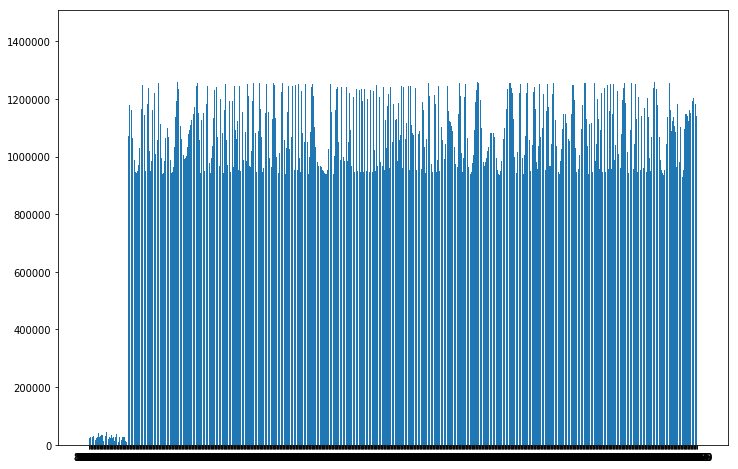

candidateList2: [[86195, 87160]]


In [161]:
# given a candidateList which contains a list of time ranges, continue to reduce the granularity until we 
# can pinpoint the time when there was an abrupt change
def pinpointChangeInEEG(delta_of_epoch, baselineNorms, candidateList, signals):
    # can't use this baselineNorms as the delta is different. the length of each epoch will now be 1s
    delta_of_epochs_seconds = math.floor(delta_of_epoch / rec.attrs['sample_frequency'])
    print("seconds, ", delta_of_epochs_seconds)
    m = 2 #how many standard deviations away
    data = list(baselineNorms.values())
    mean = math.floor(np.mean(data) / delta_of_epochs_seconds)
    std = math.floor(m * np.std(data) / delta_of_epochs_seconds)
    print("mean,",mean)
    print("std,",std)
    
    for candidate in candidateList:
        print("candidate ", candidate)
        timeStart = candidate[0]
        timeEnd = candidate[1]
        delta = timeEnd - timeStart

        norms = getNormalOfSegment(signals, timeStart, timeEnd, 1, chstart=0, chstop=19, fs=rec.attrs['sample_frequency'])
        plotScatter(norms)
        #print(norms)
        
        isPriorOutlier = False
        candidateList2 = []
        candidate2 = []
        for key, value in norms.items():
            #print("ya", value-mean, std)
            if (abs(value - mean) > std):
                #print("checking ", key, " with ", value)
                if (isPriorOutlier):
                    # just continue
                    1+1
                else:
                    # a change is caught
                    isPriorOutlier = True
                    candidate2.append(key)
            else:
                if (isPriorOutlier):
                    # back to normal baseline
                    candidate2.append(key)
                    candidateList2.append(candidate2)
                    candidate2 = []
                    isPriorOutlier = False
                else:
                    # at baseline still   
                    1+1
        if (isPriorOutlier):
            candidate2.append(key)
            candidateList2.append(candidate2)
            candidate2 = []
            isPriorOutlier = False
        print("candidateList2:",candidateList2)    
        return candidateList2        
    
candidateList2 = pinpointChangeInEEG(delta_of_epoch, baselineNorms, candidateList, signals)
# candidateList2 now contains a duples. Each duple contains a range in seconds where the EEG drastically changed from the baseline. 

In [162]:
import datetime
# convert candidate2 to readable numbers and stats
totalDurationOfBadness = 0
for candidate in candidateList2:
    print ("CCCCCCCC")
    startTime = candidate[0]
    endTime = candidate[1]
    print ("start: ", datetime.timedelta(seconds=startTime))
    print ("end: ", datetime.timedelta(seconds=endTime))
    delta = endTime - startTime
    print ("duration: ", datetime.timedelta(seconds=delta))
    totalDurationOfBadness += delta

print ("total duration of bad EEG recordings: ", datetime.timedelta(seconds=totalDurationOfBadness))
print ("% of record of bad EEG recordings: ", totalDurationOfBadness / entireDuration)


CCCCCCCC
start:  23:56:35
end:  1 day, 0:12:40
duration:  0:16:05
total duration of bad EEG recordings:  0:16:05
% of record of bad EEG recordings:  0.011071465448996684


### Annotations
It was not a coincidence that I chose this time in the record. I used the annotations to focus on portion of the record which was marked as having a seizure.

You can access the clinical annotations via rec['edf_annotations']

In [39]:
annot = rec['edf_annotations']

In [9]:
antext = [s.decode('utf-8') for s in annot['texts'][:]]
starts100ns = [xx for xx in annot['starts_100ns'][:]]  # process the bytes into text and lists of start times

In [10]:
df = pd.DataFrame(data=antext, columns=['text'])  # load into a pandas data frame
df['starts100ns'] = starts100ns
df['starts_sec'] = df['starts100ns']/10**7
del df['starts100ns']

It is easy then to find the annotations related to seizures

In [11]:
df[df.text.str.contains('sz',case=False)]

,text,starts_sec
86,SZ START,1380.512
88,SZ END,1384.246
91,SZ START,1416.897
93,SZ END,1422.843
99,SZ START,1476.933
103,SZ END,1483.269
